# Funciones de costo y otras.

En esta notebook veremos algunas funciones que aparecen en optimización y otras que aparecen en el contexto de las redes neuronales.

## Funciones de costo

En optimización el problema es encontrar una solución óptima a un dado problema. 
Cuán óptima es esta solución es descripto por una función llamada **costo**. 
La idea es encontrar el mínimo de esta función en algún dominio donde la misma esté definida. 

Aquí veremos dos casos de optimización:

1. **Regresión** Encontrar un modelo (una función) que mejor describa cierto conjunto de datos. 
2. **Clasificación** Encontrar un algoritmo que mejor particione un dado conjunto de datos. 

### Regresión 

Veamos un ejemplo simple, dado un conjunto de datos, encontremos una función (llamado modelo o ley) que mejor los aproxime. 

Como ejemplo construiremos un dato artificial como una perturbación al azar de la función:

$$
y_e(x) = 1 + x + x^3
$$

El dato será:

$$
y = y_e(x) + r(x)
$$

Con $r$ es una distribución normal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-1, 1, 100)

r = 0.5*np.random.normal(0, 0.3, 100)
y = x**3 + x + 1 + r

def model(x,par):
    return par[0]*x**3 + par[1]*x + par[2]

    
ye = model(x,[1,1,1]) #ye = x**3 + x + 1
ym = model(x,[0,1,1]) #ym = x + 1 



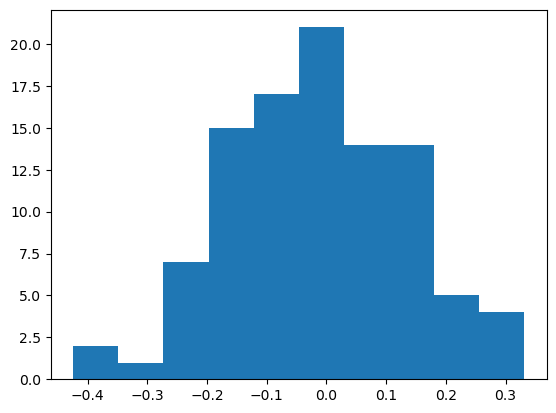

In [3]:
plt.hist(r)
plt.show()

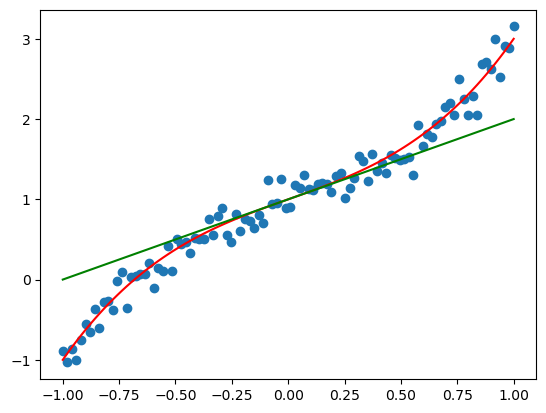

In [4]:
plt.scatter(x, y)
plt.plot(x, ye, color='r')
plt.plot(x, ym, color='g')
plt.show()

Cómo cuantificamos el error entre el modelo y los datos?

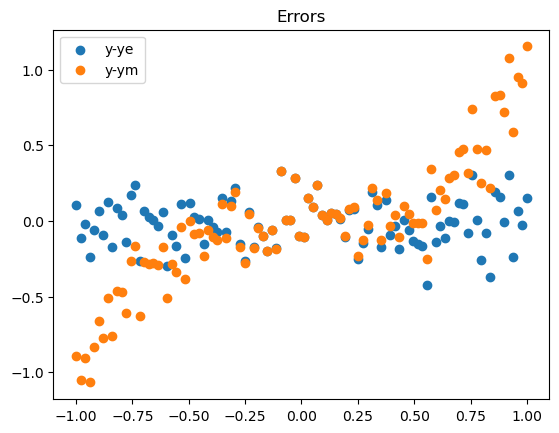

In [5]:
plt.scatter(x, y-ye, label="y-ye")
plt.scatter(x, y-ym, label="y-ym")
plt.title('Errors')
plt.legend()
plt.show()

#### Propuesta 1. 

Sumamos todos los errores elevamos al cuadrado y dividimos por el número de puntos.
Esta función costo se llama *MSE* (error cuadrático medio).

$$
MSE = \frac{\sum_{i=1}^N (y_i-ym(x_i))^2}{N}
$$


In [6]:
def mse(y, y_hat):
    return np.sum((y-y_hat)**2)/len(y)

print("MSE(y, ye) = ", mse(y, ye))
print("MSE(y, ym) = ", mse(y, ym))

MSE(y, ye) =  0.023268102589370017
MSE(y, ym) =  0.18176951000261699


Veamos como cambia esta función cuando cambiamos el primer parámetro:

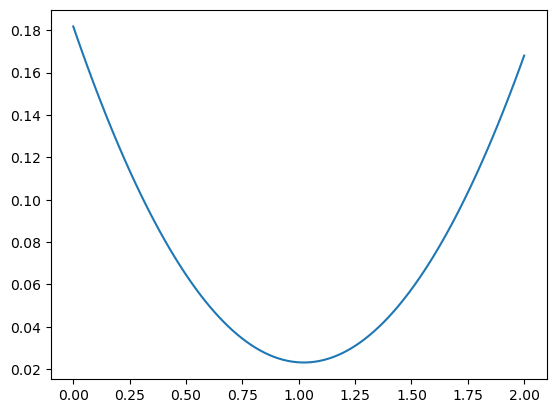

In [27]:
par_0 = np.linspace(0, 2, 100)

mse_vals = np.zeros(len(par_0))

for i in range(len(par_0)):
    mse_vals[i] = mse(y, model(x,[par_0[i],1,1]))

plt.plot(par_0, mse_vals, label="MSE(y, model)")

In [29]:
min_val = np.min(mse_vals)
min_idx = np.argmin(mse_vals)
print("Minimum value of MSE(y, model) = ", min_val)
print("Minimum value of par_0 = ", par_0[min_idx])

Minimum value of MSE(y, model) =  0.02319913356865154
Minimum value of par_0 =  1.0303030303030305


### Contra: Muy sensible a cambios aleatorios grandes


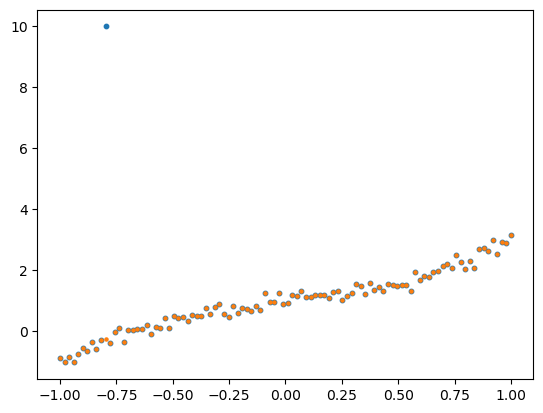

In [20]:
y_alt = y.copy()
y_alt[10] = 10

plt.scatter(x, y_alt, s=10, label="y_alt")
plt.scatter(x, y, s=5, label="y")
plt.show()

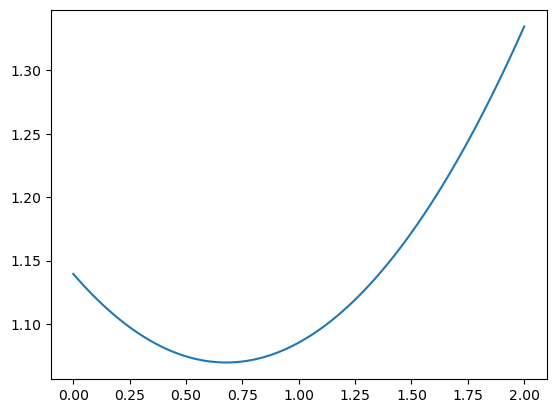

In [30]:
mse_vals_alt = np.zeros(len(par_0))
for i in range(len(par_0)):
    mse_vals_alt[i] = mse(y_alt, model(x,[par_0[i],1,1]))

plt.plot(par_0, mse_vals_alt, label="MSE(y_alt, model)")

In [31]:
min_val = np.min(mse_vals_alt)
min_idx = np.argmin(mse_vals_alt)
print("Minimum value of MSE(y, model) = ", min_val)
print("Minimum value of par_0 = ", par_0[min_idx])

Minimum value of MSE(y, model) =  1.0697533830821155
Minimum value of par_0 =  0.686868686868687


### Propuesta 2

Sumamos los valores absolutos (sin elevar al cuadrado)

$$
MAE = \frac{\sum_{i=1}^N |y_i-ym(x_i)|}{N}
$$

### Cons: No se diferenciable en el mínimo.
### Fab: No es sensible a cambios grandes.

In [24]:
def mae(y, y_hat):
    return np.sum(np.abs(y-y_hat))/len(y) 

print("MAE(y, ye) = ", mae(y, ye))  


MAE(y, ye) =  0.12218029781100945


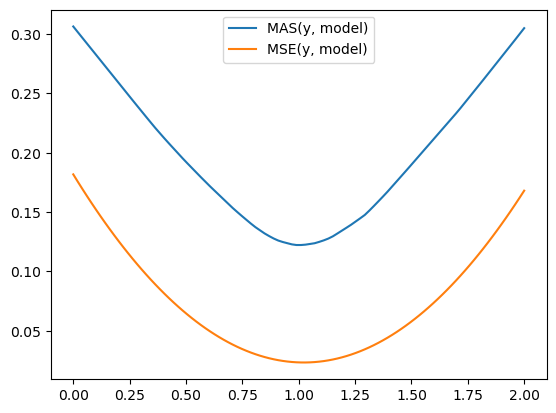

In [35]:
mae_vals = np.zeros(len(par_0))

for i in range(len(par_0)):
    mae_vals[i] = mae(y, model(x,[par_0[i],1,1]))

plt.plot(par_0, mae_vals, label="MAS(y, model)")
plt.plot(par_0, mse_vals, label="MSE(y, model)")
plt.legend()
plt.show()

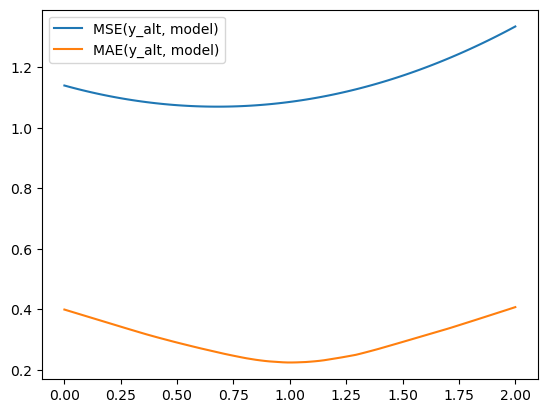

In [38]:
mae_vals_alt = np.zeros(len(par_0))
for i in range(len(par_0)):
    mae_vals_alt[i] = mae(y_alt, model(x,[par_0[i],1,1]))

plt.plot(par_0, mse_vals_alt, label="MSE(y_alt, model)")
plt.plot(par_0, mae_vals_alt, label="MAE(y_alt, model)")
plt.legend()
plt.show()

### Propuesta 3 Huber_loss

$$ 
huber\_loss(y,y_hat) = \left(
                \begin{align} 
                \frac{(y-\hat{y})^2}{2} & \;\;\;\;\;\; si \;\; |y - \hat{y}| < \delta \nonumber \\
                \delta |y - \hat{y}| + \delta^2/2 & \;\;\;\;\;\;\; si \;\; |y - \hat{y}| \leq \delta \nonumber
                \end{align}
                \right. 
                $$



In [36]:
def huber_loss(y, y_hat, delta=1.0):
    huber_mse = 0.5*(y-y_hat)**2
    huber_mae = delta * (np.abs(y - y_hat) - 0.5 * delta)
    return np.where(np.abs(y - y_hat) <= delta, huber_mse, huber_mae)

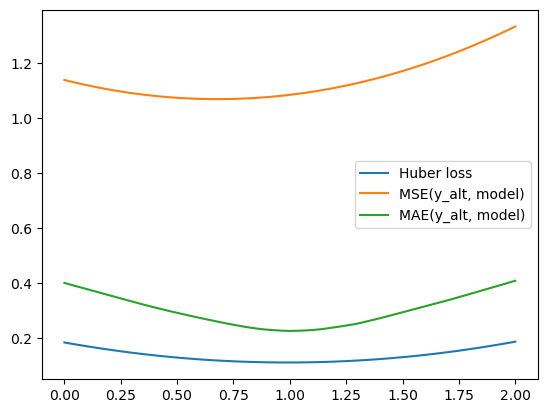

In [40]:
huber_loss_vals = np.zeros(len(par_0))
for i in range(len(par_0)):
    huber_loss_vals[i] = np.sum(huber_loss(y_alt, model(x,[par_0[i],1,1])))/len(y_alt)

plt.plot(par_0, huber_loss_vals, label="Huber loss")
plt.plot(par_0, mse_vals_alt, label="MSE(y_alt, model)")
plt.plot(par_0, mae_vals_alt, label="MAE(y_alt, model)")
plt.legend()
plt.show()